<a href="https://colab.research.google.com/github/MFarooq-02/GapenSimulation/blob/main/Gapen_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


Date
2020-01-01    154.550003
2020-01-02    154.227737
2020-01-03    154.000000
2020-01-06    154.449997
2020-01-07    154.600006
                 ...    
2024-03-25    276.381439
2024-03-26    277.799988
2024-03-27    277.000000
2024-03-28    277.500000
2024-03-29    277.500000
Name: Close, Length: 1108, dtype: float64


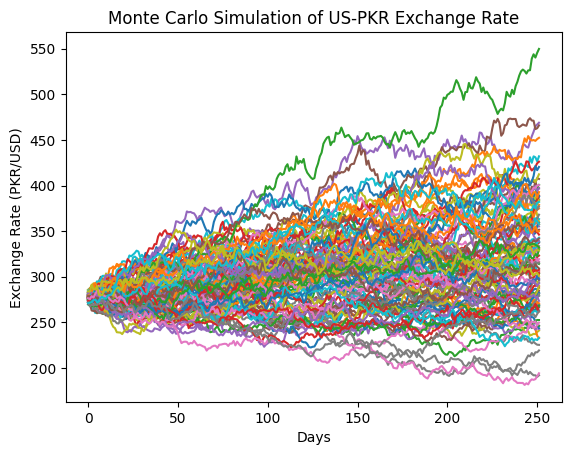

Simulated price: 352.6753798568368


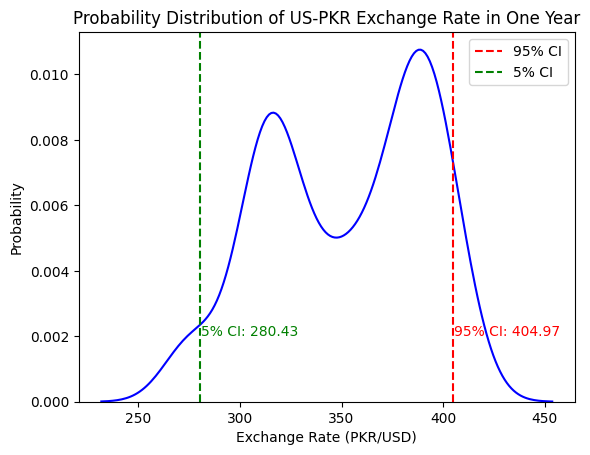

In [ ]:
# Monte Carlo Simulation of exchange rate

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the US-PKR exchange rate data
import yfinance as yf

usdpkr = yf.download('USDPKR=X', start="2020-01-01", end="2024-03-31")['Close']

print(usdpkr)

num_simulations = 100    # number of simulations

initial_exchange_rate = usdpkr[-1]    # initial exchange rate

mean_change = usdpkr.pct_change().mean()
std_change = usdpkr.pct_change().std()

exchange_rate_changes = np.random.normal(loc=mean_change, scale=std_change, size=(num_simulations, 252))

simulated_exchange_rates = initial_exchange_rate * (1 + exchange_rate_changes).cumprod(axis=1)

# Plot the simulated exchange rates
plt.plot(simulated_exchange_rates.T)
plt.xlabel("Days")
plt.ylabel("Exchange Rate (PKR/USD)")
plt.title("Monte Carlo Simulation of US-PKR Exchange Rate")
plt.show()

print("Simulated price:", simulated_exchange_rates[-1, :].mean())

sns.kdeplot(simulated_exchange_rates[-1, :], color="blue")
plt.xlabel("Exchange Rate (PKR/USD)")
plt.ylabel("Probability")
plt.title("Probability Distribution of US-PKR Exchange Rate in One Year")

# 5% confidence intervals
upper_ci = np.percentile(simulated_exchange_rates[-1, :], 95)
lower_ci = np.percentile(simulated_exchange_rates[-1, :], 5)
plt.axvline(upper_ci, color="red", linestyle="--", label="95% CI")
plt.axvline(lower_ci, color="green", linestyle="--", label="5% CI")
plt.text(upper_ci + 0.5, 0.002, f"95% CI: {upper_ci:.2f}", color="red")
plt.text(lower_ci + 0.5, 0.002, f"5% CI: {lower_ci:.2f}", color="green")

plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


Date
2020-01-01    154.550003
2020-01-02    154.227737
2020-01-03    154.000000
2020-01-06    154.449997
2020-01-07    154.600006
                 ...    
2024-03-25    276.381439
2024-03-26    277.799988
2024-03-27    277.000000
2024-03-28    277.500000
2024-03-29    277.500000
Name: Close, Length: 1108, dtype: float64


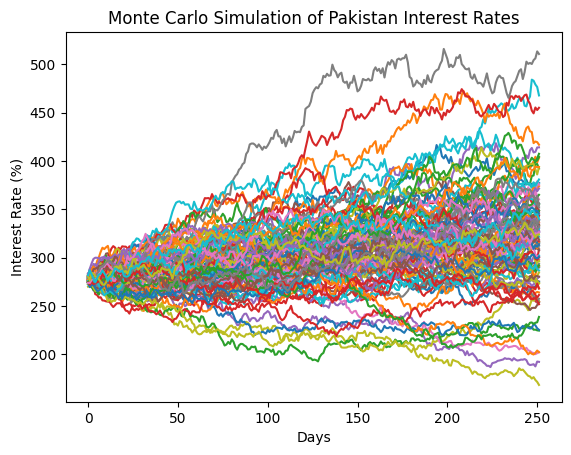

Simulated price: 321.63018184470576


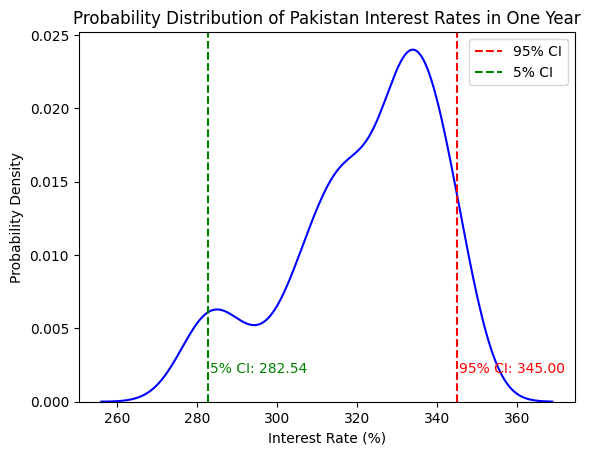

In [ ]:
# Monte Carlo Simulation of interest rates

interest_rates = yf.download('PKR=X', start="2020-01-01", end="2024-03-31")['Close']

print(interest_rates)

num_simulations = 100   # number of simulations

initial_interest_rate = interest_rates[-1]    # initial interest rate

mean_change = interest_rates.pct_change().mean()
std_change = interest_rates.pct_change().std()

interest_rate_changes = np.random.normal(loc=mean_change, scale=std_change, size=(num_simulations, 252))

simulated_interest_rates = initial_interest_rate * (1 + interest_rate_changes).cumprod(axis=1)

# Plot the simulated interest rates
plt.plot(simulated_interest_rates.T)
plt.xlabel("Days")
plt.ylabel("Interest Rate (%)")
plt.title("Monte Carlo Simulation of Pakistan Interest Rates")
plt.show()

print("Simulated price:", simulated_interest_rates[-1, :].mean())

sns.kdeplot(simulated_interest_rates[-1, :], color="blue")

plt.xlabel("Interest Rate (%)")
plt.ylabel("Probability Density")
plt.title("Probability Distribution of Pakistan Interest Rates in One Year")

# 5% confidence intervals
upper_ci = np.percentile(simulated_interest_rates[-1, :], 95)
lower_ci = np.percentile(simulated_interest_rates[-1, :], 5)
plt.axvline(upper_ci, color="red", linestyle="--", label="95% CI")
plt.axvline(lower_ci, color="green", linestyle="--", label="5% CI")
plt.text(upper_ci + 0.5, 0.002, f"95% CI: {upper_ci:.2f}", color="red")
plt.text(lower_ci + 0.5, 0.002, f"5% CI: {lower_ci:.2f}", color="green")

plt.legend()
plt.show()

In [ ]:
import math
from scipy.stats import norm  # Importing the standard normal distribution

# making balance sheet (i.e. assets = liabilities)
# assets = international reserves + domestic currency assets
# liabilities = domestic currency liabilities + foreign currency debt

# defining variables
Va = 1000000   # Va = value of sovereign assets
DB = 900000    # DB = distress barrier or default-free debt
rf = 0.05      # rf = risk-free interest rate
t = 1          # t = time to maturity on a default-free bond in years
Oa = 0.2       # Oa = standard deviation of return on sovereign assets
spread = 0.02  # spread = credit default swap spread
R = 0.4        # R = recovery rate (30% is used in paper)
# N(d) =  cumulative probability distribution function for a standard normal variable (that is, the probability that a random draw from a standard normal distribution will be below d)

# making formulae

def calculate_Vdcl(Va, DB, rf, t, Oa):  # Vdcl = value of domestic currency liabilities
    d1 = ((math.log(Va / DB)) + (rf + 0.5 * (Oa ** 2)) * t) / (Oa * math.sqrt(t))
    d2 = d1 - Oa * math.sqrt(t)
    N_d1 = norm.cdf(d1)  # Cumulative distribution function for d1
    N_d2 = norm.cdf(d2)  # Cumulative distribution function for d2
    Vdcl = Va * N_d1 - DB * math.exp(-rf * t) * N_d2
    return Vdcl
Vdcl = calculate_Vdcl(Va, DB, rf, t, Oa)

def calculate_Vfcl(Va, Vdcl):   # Vfcl = value of foreign currency liabilities
    Vfcl = Va - Vdcl
    return Vfcl
Vfcl = calculate_Vfcl(Va, Vdcl)

def calculate_D2D(Va, DB, rf, t, Oa):    # D2D = distance to distress
    d2 = (math.log(Va/DB) + rf * t) / (Oa * math.sqrt(t))
    D2D = d2
    return D2D
D2D = calculate_D2D(Va, DB, rf, t, Oa)

def calculate_RNS(Vfcl, DB, rf, t):     # RNS = risk-neutral credit spread
    y = -(1 / t) * math.log(Vfcl / DB)
    RNS = y - rf
    return RNS
RNS = calculate_RNS(Vfcl, DB, rf, t)

def calculate_MIDP(spread, t, R):      # MIDP = market implied default probability
    MIDP = (1 - math.exp(-spread * t)) / (1 - R)
    return MIDP
MIDP = calculate_MIDP(spread, t, R)

Vl = Vdcl + Vfcl  # Value of sovereign liabilities

# printing result
print("Value of domestic currency liabilities:", Vdcl)
print("Value of foreign currency liabilities:", Vfcl)
print("Value of sovereign liabilities:", Vl)
if Va == Vl:
    print("Balance sheet values are correct")
else:
    print("Balance sheet values are incorrect")
print("Value of Distance to Distress:", D2D)
print("Risk-Neutral Spread:", RNS)
print("Market Implied Default Probability:", MIDP)

Value of domestic currency liabilities: 166994.48408416007
Value of foreign currency liabilities: 833005.5159158399
Value of sovereign liabilities: 1000000.0
Balance sheet values are correct
Value of Distance to Distress: 0.7768025782891317
Risk-Neutral Spread: 0.027354499431684776
Market Implied Default Probability: 0.03300221115540791
